# Derivatives

## Definition


Let's consider a **scalar** argument function $f:\mathbb{R}\to\mathbb{R}$.
<br><br>
1. The classic definition of derivative is given by:
<br><br>
$$
f'(x)\triangleq\lim_{h\to 0}\frac{f(x+h)-f(x)}{h}.
$$
<br><br>
If the limit **exists**, the derivative is a **measure** of how fast the function changes if we move *a bit* away from $x$.
<br><br>
2. Geometrically $f'(x)$ it is usually *interpreted* as the slope of the line tangent to $f(x)$.
<br><br>
3. In the same sense, one can think of $f''(x)$ as measuring curvature.



Matplotlib created a temporary cache directory at /tmp/matplotlib-4n_v4fwa because the default path (/teamspace/studios/this_studio/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


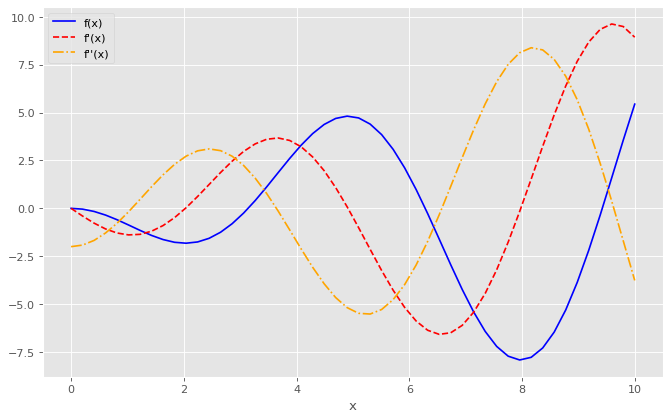

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

f    = lambda x: -x*np.sin(x)
df   = lambda x: -(np.sin(x) + x*np.cos(x))
ddf  = lambda x: x*np.sin(x) - 2*np.cos(x)

plt.style.use('ggplot')


figure(figsize=(10, 6), dpi=80)

x = np.linspace(0, 10.0)

plt.plot(x, f(x), color='blue', label="f(x)")
plt.plot(x, df(x), color='red', linestyle='--', label = "f'(x)")
plt.plot(x, ddf(x), color='orange', linestyle="dashdot", label="f''(x)")
plt.xlabel("x")

# Formato
plt.legend(loc='upper left')
plt.grid(True)


### Importance
The concept of derivative is used directly in a number of branches of mathematics:
1. Optimization
2. Probability
3. Differential equations
4. etc

## Taylor series
One of the most important applications is its use in series, in particular those known as the **Taylor Series**. Given a function $f:\mathbb{R}\to\mathbb{R}$, the Taylor expantion will be given by:
<br><br>
\begin{align}
f(x) &= f(a)+{\frac {f'(a)}{1!}}(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+{\frac {f^{(3)}(a)}{3!}}(x-a)^{3}+\cdots +{\frac {f^{(n)}(a)}{n!}}(x-a)^{n}+\cdots \\
 &=  \sum _{n=0}^{\infty }{\frac {f^{(n)}(a)}{n!}}(x-a)^{n}.
\end{align}
<br><br>
It is important to note that the series requires that the function be *infinitely differentiable*. Although we have written its definition for real values, it is possible to extend the definition to complex series, very useful in other domains, such as frequency.
<br><br>
### Maclaurin series
When in the *Taylor* series we make $a=0$, the resulting series is usually called the **Maclaurin** series, and is defined by:
<br><br>
$$
\sum _{n=0}^{\infty }{\frac {f^{(n)}(0)}{n!}}x^{n}.
$$
<br><br>
On many occasions these series are used to numerically estimate some known functions, for example:
<br><br>
$$
\sin(x)=\sum _{k=0}^{\infty }{\cfrac {(-1)^{k}\;x^{2k+1}}{(2k+1)!}}={\cfrac {x}{1!}}-{\cfrac {x^{3}}{3!}}+{\cfrac {x^{5}}{5!}}-{\cfrac {x^{7}}{7!}}\;\dots
$$

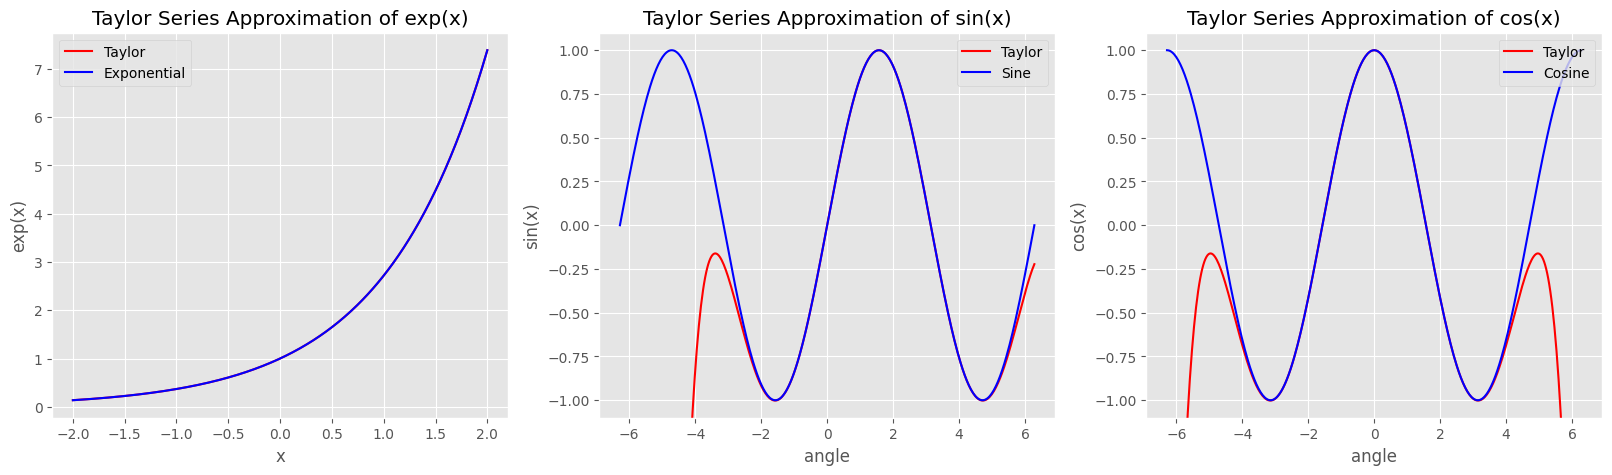

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

plt.style.use('ggplot')

def d_sine(x:float, n:int) -> float:
    res = n % 4
    if res == 0: return np.sin(x)
    if res == 1: return np.cos(x)
    if res == 2: return -np.sin(x)
    if res == 3: return -np.cos(x)
    return 0.0  # Not allowed

def d_exp(x:float, n:int) -> float:
    return np.exp(x)

def d_cos(x:float, n:int) -> float:
    res = n % 4
    if res == 0: return np.cos(x)
    if res == 1: return -np.sin(x)
    if res == 2: return -np.cos(x)
    if res == 3: return np.sin(x)
    return 0.0  # Not allowed

def taylor_series(f, x:float, n:int, a:float=0.0) -> float:
    serie = [(f(a, i) / math.factorial(i)) * ((x - a) ** i) for i in range(0, n + 1)]
    return np.sum(serie)

# Parameters for Taylor series
series_term = 10
a_exp = 0.5
a_sin = 0.5 * np.pi
a_cos = 0.0

# Exponential
x_exp = np.linspace(-2, 2, 400)
y_exp = [taylor_series(f=d_exp, x=xi, n=series_term, a=a_exp) for xi in x_exp]

# Sine
x_sin = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y_sin = [taylor_series(f=d_sine, x=xi, n=series_term, a=a_sin) for xi in x_sin]

# Cosine
x_cos = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y_cos = [taylor_series(f=d_cos, x=xi, n=series_term, a=a_cos) for xi in x_cos]

# Plotting
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20, 5))

# Exponential Plot
ax1.plot(x_exp, y_exp, color="red", label="Taylor")
ax1.plot(x_exp, np.exp(x_exp), color="blue", label="Exponential")
ax1.set_title("Taylor Series Approximation of exp(x)")
ax1.set_xlabel("x")
ax1.set_ylabel("exp(x)")
ax1.legend(loc='upper left')
ax1.grid(True)

# Sine Plot
ax2.plot(x_sin, y_sin, color="red", label="Taylor")
ax2.plot(x_sin, np.sin(x_sin), color="blue", label="Sine")
ax2.set_title("Taylor Series Approximation of sin(x)")
ax2.set_xlabel("angle")
ax2.set_ylabel("sin(x)")
ax2.set_ylim(-1.1, 1.1)
ax2.legend(loc='upper right')
ax2.grid(True)

# Cosine Plot
ax3.plot(x_cos, y_cos, color="red", label="Taylor")
ax3.plot(x_cos, np.cos(x_cos), color="blue", label="Cosine")
ax3.set_title("Taylor Series Approximation of cos(x)")
ax3.set_xlabel("angle")
ax3.set_ylabel("cos(x)")
ax3.set_ylim(-1.1, 1.1)
ax3.legend(loc='upper right')
ax3.grid(True)

plt.show()



## Derivatives: numerical estimation
---
On many occasions it is impossible to analytically estimate $f'(x)$ and it is necessary to use numerical methods; some options:<br><br>

\begin{equation}
f′(x)≈ \frac{f(x+h)−f(x)}{h}\approx \frac{f(x+h/2)−f(x−h/2)}{h}\approx \frac{f(x)−f(x−h)}{h},
\end{equation}
<br><br>
for values $h \to 0$.

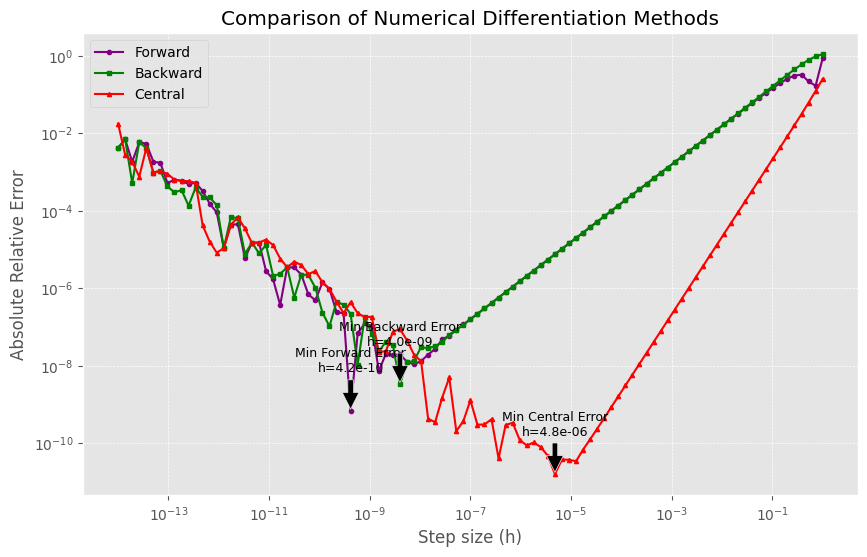

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Numerical differentiation methods
def diff_forward(f, x: float, h: float = np.sqrt(np.finfo(float).eps)) -> float:
    return (f(x + h) - f(x)) / h

def diff_central(f, x: float, h: float = np.sqrt(np.finfo(float).eps)) -> float:
    diff = h / 2.0
    return (f(x + diff) - f(x - diff)) / h

def diff_backward(f, x: float, h: float = np.sqrt(np.finfo(float).eps)) -> float:
    return (f(x) - f(x - h)) / h

# Generate step sizes
hs = [10**x for x in np.linspace(-14, 0.0, num=101)]

# Function and its analytical derivative
fx = lambda x: np.sin(x**2)      # Function
fpx = lambda x: 2 * x * np.cos(x**2)  # Analytical derivative

value = 0.5 * np.pi
derivative_value = fpx(value)

# Absolute relative error
are = lambda real, estimated: np.abs((real - estimated) / real)

# Calculate errors
forwards = [are(derivative_value, diff_forward(fx, value, h)) for h in hs]
backwards = [are(derivative_value, diff_backward(fx, value, h)) for h in hs]
centrals = [are(derivative_value, diff_central(fx, value, h)) for h in hs]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hs, forwards, color='purple', label='Forward', marker='o', markersize=3)
plt.plot(hs, backwards, color='green', label='Backward', marker='s', markersize=3)
plt.plot(hs, centrals, color='red', label='Central', marker='^', markersize=3)

# Enhancements
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Step size (h)')
plt.ylabel('Absolute Relative Error')
plt.title('Comparison of Numerical Differentiation Methods')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Annotate minimum error points
min_forward_h = hs[np.argmin(forwards)]
min_backward_h = hs[np.argmin(backwards)]
min_central_h = hs[np.argmin(centrals)]

plt.annotate(f'Min Forward Error\nh={min_forward_h:.1e}',
             xy=(min_forward_h, min(forwards)),
             xytext=(min_forward_h, min(forwards) * 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9, ha='center')

plt.annotate(f'Min Backward Error\nh={min_backward_h:.1e}',
             xy=(min_backward_h, min(backwards)),
             xytext=(min_backward_h, min(backwards) * 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9, ha='center')

plt.annotate(f'Min Central Error\nh={min_central_h:.1e}',
             xy=(min_central_h, min(centrals)),
             xytext=(min_central_h, min(centrals) * 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9, ha='center')

plt.show()


In [4]:
np.finfo(float).eps

2.220446049250313e-16